Данные, которые собраны для составления рейтинга сортов и видов вин.

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [2]:
data_path = "D:\iitmm\Machine Learning\classification\winemag-data_first150k.csv"

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


На основе данных прочитанного файла видно, что в нем находится следующая информация:
- country - в какой стране было произведено вино
- description - описание вкуса вина
- designation - название места, где было произведено вино
- points - Количество "баллов" WineEnthusiast по шкале 1-100
- price - цена за бутылку
- province - провинция или штат, где произведено вино
- region_1 - место, где выращивают виноград для вина
- region_2 - более специфическое название региона или места
- variety - тип винограда, используемого для производства вина
Признаки присутствуют как категориальные, так числовые и просто текстовые.

In [5]:
data.shape

(150930, 11)

Данный файл содержит более 150 000 данных, 11 критериев.
Выведем список названия столбцов.

In [6]:
data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [7]:
print(data['country'].dtype)
data['country'] = data['country'].astype('category')
data['country'].dtype

object


CategoricalDtype(categories=['Albania', 'Argentina', 'Australia', 'Austria',
                  'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada',
                  'Chile', 'China', 'Croatia', 'Cyprus', 'Czech Republic',
                  'Egypt', 'England', 'France', 'Georgia', 'Germany', 'Greece',
                  'Hungary', 'India', 'Israel', 'Italy', 'Japan', 'Lebanon',
                  'Lithuania', 'Luxembourg', 'Macedonia', 'Mexico', 'Moldova',
                  'Montenegro', 'Morocco', 'New Zealand', 'Portugal',
                  'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'South Africa',
                  'South Korea', 'Spain', 'Switzerland', 'Tunisia', 'Turkey',
                  'US', 'US-France', 'Ukraine', 'Uruguay'],
, ordered=False)

In [8]:
print(data['designation'].dtype)
data['designation'] = data['designation'].astype('category')
data['designation'].dtype

object


CategoricalDtype(categories=['"M"', '#50 Mon Chou', '#SocialSecret', ''72',
                  ''A Naca Rosso', ''A Rina', ''Na Vota', ''Nearly Naked'',
                  ''S'', ''l Clumbé',
                  ...
                  'Ürziger Würzgarten Auslese Goldkap',
                  'Ürziger Würzgarten Beerenauslese',
                  'Ürziger Würzgarten Eiswein', 'Ürziger Würzgarten Kabinett',
                  'Ürziger Würzgarten Spätlese', 'étoile Brut', 'ía',
                  'ía Crianza', 'Župska', '‘Rough Justice' Red'],
, ordered=False)

In [9]:
print(data['province'].dtype)
data['province'] = data['province'].astype('category')
data['province'].dtype

object


CategoricalDtype(categories=['Achaia', 'Aconcagua Costa', 'Aconcagua Valley', 'Aegean',
                  'Ahr', 'Aigialias Slopes', 'Alenquer', 'Alentejano',
                  'Alentejo', 'Alenteo',
                  ...
                  'Wellington', 'Western Australia', 'Western Cape',
                  'Wiener Gemischter Satz', 'Württemberg', 'Zenata', 'Zitsa',
                  'Österreichischer Sekt', 'Štajerska', 'Župa'],
, ordered=False)

In [10]:
data['region_1'] = data['region_1'].astype('category')
data['region_2'] = data['region_2'].astype('category')
data['winery'] = data['winery'].astype('category')
data['variety'] = data['variety'].astype('category')

Мы преобразовали все категориальные данные к виду categorial

In [11]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Посмотрим зависимость цены от количества баллов, поставленных сорту, на графике.

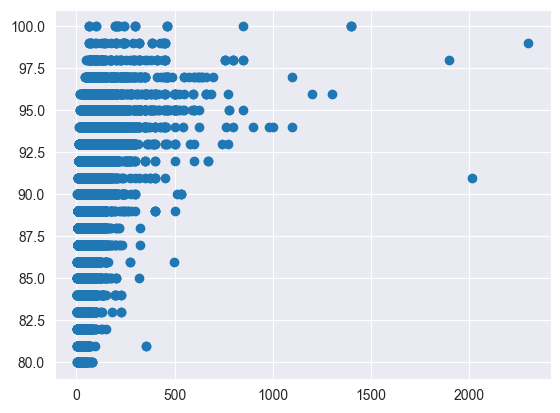

In [12]:
plt.scatter(data['price'], data['points'])

По информации, которая была получена в ходе построения графика, можно сказать, что, в среднем, цена не сильно меняется с увеличением оценки качества и вкуса, однако, существуют и исключения. Для постоения более полноценной картины необходимо провести более глубокий анализ. Однако наши данные на данном этапе не подходят для анализа, так как в них присутствуют выбросы и у некоторых видов вин отсутствуют данные.

In [13]:
print(data['price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995]))
print(data['points'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995]))

0.005      7.0
0.010      8.0
0.050     10.0
0.100     12.0
0.500     24.0
0.900     60.0
0.950     80.0
0.990    150.0
0.995    220.0
Name: price, dtype: float64
0.005    80.0
0.010    81.0
0.050    83.0
0.100    84.0
0.500    88.0
0.900    92.0
0.950    93.0
0.990    95.0
0.995    96.0
Name: points, dtype: float64


Необходимо удалить выбросы, то есть те данные, которые выходят за пределы 0.005 и 0.995. Построим матрицу корреляций, чтобы увидеть зависимость между числовыми данными.

In [14]:
data.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,-0.094197,-0.036687
points,-0.094197,1.000000,0.459863
price,-0.036687,0.459863,1.000000


Из матрицы коррелиции видно, что значение корреляции меньше 0.5, значит, удалять данные нет необходимости. Поэтому ограничимся удалением выбросов.

In [15]:
rows_to_drop = data[
    (data['price'] < data['price'].quantile(0.005)) | (data['price'] > data['price'].quantile(0.995)) |
    (data['points']  < data['points' ].quantile(0.005)) | (data['points']  > data['points' ].quantile(0.995))].index
new_data = data.drop(rows_to_drop)
new_data.shape

(149414, 11)

Около тысячи данных были удалены, так как они загрязняли нашу выборку. Теперь можно попробовать визуализировать наши данные.

# Визуализация

Сначала выведем сводную информацию по очищенной выборке.

In [16]:
new_data.describe()

,Unnamed: 0,points,price
count,149414.000000,149414.000000,135808.000000
mean,75419.179347,87.843709,31.397974
std,43563.607247,3.152030,24.115318
min,1.000000,80.000000,7.000000
25%,37737.250000,86.000000,16.000000
50%,75372.500000,88.000000,24.000000
75%,113101.750000,90.000000,40.000000
max,150929.000000,96.000000,220.000000


Общее количество данных: 149 414 видов вин
Среднее количество баллов рейтинга от 1 до 100: 87.84
Средняя цена за бутылку: 31 доллар за бутылку
Стандартное отклонение от среднего балла: 3
Стандартное отклонение от средней цены за бутылку: 24 доллара
Вино с самым низким рейтингом - 80 баллов, самое дешевое вино - 7 долларов за бутылку
Самый высокий балл - 96, самая высокая цена за бутылку - 220 долларов

In [17]:
new_data.describe(include=['category'])

,country,designation,province,region_1,region_2,variety,winery
count,149409,104173,149409,124543,60567,149414,149414
unique,48,30418,454,1228,18,632,14749
top,US,Reserve,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62008,2744,44182,6112,13049,14321,344


Наибольшее количество вина было произведено в US - Соединенные штаты, провинция - Калифорния
Всего стран участвовали в анализе - 48 и из них Соединенные Штаты встречались 62 008 раз, из которых Штат Калифорния упоминался 44 182 раза.
Самая популярная винодельня, которая производила 344 вида вина, - Williams Selyem, США, штат Калифорния.
Самый популярная разновидность вина - Шардане - 14 321 раз встретилась среди 632 разновидностей вин.

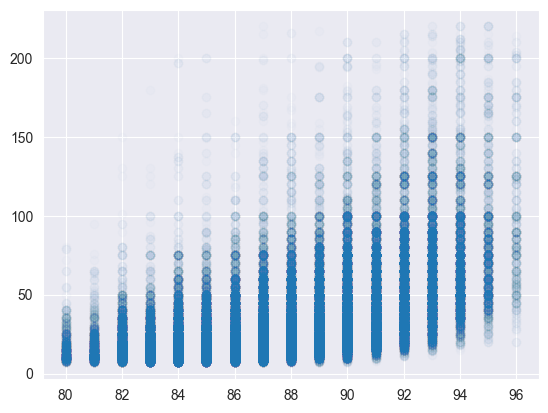

In [18]:
plt.scatter(new_data['points'], new_data['price'], alpha=0.01)

На графике видно, что основной разброс цены - до 50 долларов с рейтингом до 88 баллов и до 100 долларов с рейтингом 86 и выше. Это говорит о том, что цены, в среднем, колеблятся не сильно. От средней цены разница (дисперсия по оценке полученного графика - не точная) около 30 долларов.

В нашей выборке, в столбце regoin_2 есть пропущенные значения. Так как эти значения не были не добавлены случайно, а этих данных просто нет, дабы избежать пустых ячеек скопируем в них данные из столбца region_1.

In [19]:
print(new_data.isna())

        Unnamed: 0  country  description  designation  points  price  \
1            False    False        False        False   False  False   
2            False    False        False        False   False  False   
3            False    False        False        False   False  False   
4            False    False        False        False   False  False   
5            False    False        False        False   False  False   
...            ...      ...          ...          ...     ...    ...   
150925       False    False        False         True   False  False   
150926       False    False        False        False   False  False   
150927       False    False        False        False   False  False   
150928       False    False        False        False   False  False   
150929       False    False        False         True   False  False   

        province  region_1  region_2  variety  winery  
1          False     False      True    False   False  
2          False     Fa

In [20]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149414 entries, 1 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Unnamed: 0   149414 non-null  int64   
 1   country      149409 non-null  category
 2   description  149414 non-null  object  
 3   designation  104173 non-null  category
 4   points       149414 non-null  int64   
 5   price        135808 non-null  float64 
 6   province     149409 non-null  category
 7   region_1     124543 non-null  category
 8   region_2     60567 non-null   category
 9   variety      149414 non-null  category
 10  winery       149414 non-null  category
dtypes: category(7), float64(1), int64(2), object(1)
memory usage: 9.4+ MB
None


Из сводной информации видно, что у нас есть пустые значения во всех столбцах, кроме description, points, variety, winery.
Так как столбец с названиями стран мы не можем никак качественно заполнить, то удалим сорты вин, где страна не указана.

In [21]:
new_data.dropna(subset=['country'], inplace=True)

In [22]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149409 entries, 1 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Unnamed: 0   149409 non-null  int64   
 1   country      149409 non-null  category
 2   description  149409 non-null  object  
 3   designation  104168 non-null  category
 4   points       149409 non-null  int64   
 5   price        135803 non-null  float64 
 6   province     149409 non-null  category
 7   region_1     124543 non-null  category
 8   region_2     60567 non-null   category
 9   variety      149409 non-null  category
 10  winery       149409 non-null  category
dtypes: category(7), float64(1), int64(2), object(1)
memory usage: 9.4+ MB
None


После удаления пустых строк в столбце country, столбцов с пустыми значениями осталось всего три - designation, price, region_1, region_2. Проделаем ту же оперцию со столбцами designation и region_1.

In [23]:
new_data.dropna(subset=['designation'], inplace=True)
new_data.dropna(subset=['region_1'], inplace=True)

In [24]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84749 entries, 1 to 150928
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   84749 non-null  int64   
 1   country      84749 non-null  category
 2   description  84749 non-null  object  
 3   designation  84749 non-null  category
 4   points       84749 non-null  int64   
 5   price        76489 non-null  float64 
 6   province     84749 non-null  category
 7   region_1     84749 non-null  category
 8   region_2     39154 non-null  category
 9   variety      84749 non-null  category
 10  winery       84749 non-null  category
dtypes: category(7), float64(1), int64(2), object(1)
memory usage: 6.1+ MB


Количество наших данных сократилось до 84 749 строк. Из столбцов с пустыми значениями остались price и region_2. Проинтерполируем столбец price.

In [25]:
mean_val = new_data['price'].mean()
print(mean_val)
new_data['price'].interpolate(method='polynomial', order=2, inplace=True)

35.779863771261226


In [26]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84749 entries, 1 to 150928
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   84749 non-null  int64   
 1   country      84749 non-null  category
 2   description  84749 non-null  object  
 3   designation  84749 non-null  category
 4   points       84749 non-null  int64   
 5   price        84749 non-null  float64 
 6   province     84749 non-null  category
 7   region_1     84749 non-null  category
 8   region_2     39154 non-null  category
 9   variety      84749 non-null  category
 10  winery       84749 non-null  category
dtypes: category(7), float64(1), int64(2), object(1)
memory usage: 6.1+ MB


И теперь скопируем в пропущенные значения столбца region_2 значения из столбца region_1.

In [63]:
df = new_data.copy()
dff = df['region_2'].cat.add_categories(df['region_1']).fillna(df['region_1'])

ValueError: new categories must not include old categories: {'Napa-Sonoma', 'Napa', 'Southern Oregon', 'Finger Lakes', 'Willamette Valley', 'South Coast', 'Sonoma', 'Sierra Foothills', 'Central Coast', 'Oregon Other', 'Long Island', 'North Coast', 'Central Valley'}

In [35]:
new_data = new_data.drop(columns=['region_2'])

Нормализуем наши данные в столбцах points и price, удалим столбец Unnamde: 0

In [36]:
new_data = new_data.drop(columns=['Unnamed: 0'])

In [37]:
new_data['points'] = new_data['points'] / new_data['points'].max()
new_data['price'] = new_data['price'] / new_data['price'].max()

In [38]:
new_data

,country,description,designation,points,price,province,region_1,variety,winery
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,1.000000,0.225509,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,1.000000,0.184507,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,1.000000,0.133255,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,0.989583,0.135305,Provence,Bandol,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,0.989583,0.149656,Northern Spain,Toro,Tinta de Toro,Numanthia
...,...,...,...,...,...,...,...,...,...
150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,0.947917,0.061502,Champagne,Champagne,Champagne Blend,Jacquart
150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,0.947917,0.143506,Champagne,Champagne,Champagne Blend,Heidsieck & Co Monopole
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,0.947917,0.055352,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,0.947917,0.041002,Southern Italy,Fiano di Avellino,White Blend,Terredora


После того, как данные обработались, можно разделить их на тестовую и обучающую выборки. Возьмем за y variety. Данные с описанием вина нам не нужны, так как мы еще не умеем с ними работать и предобрабатывать их.

In [44]:
y = new_data['variety']
new_data = new_data.drop(columns='variety')

In [47]:
new_data = new_data.drop(columns='description')

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(new_data.country)
new_data['country'] = le.transform(new_data.country)

In [62]:
le.fit(new_data.designation)
new_data['designation'] = le.transform(new_data.designation)
le.fit(new_data.province)
new_data['province'] = le.transform(new_data.province)

le.fit(new_data.region_1)
new_data['region_1'] = le.transform(new_data.region_1)
le.fit(new_data.winery)
new_data['winery'] = le.transform(new_data.winery)

In [46]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, random_state=42)

In [64]:
X_train.shape

(63561, 7)

In [65]:
X_test.shape

(21188, 7)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [71]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

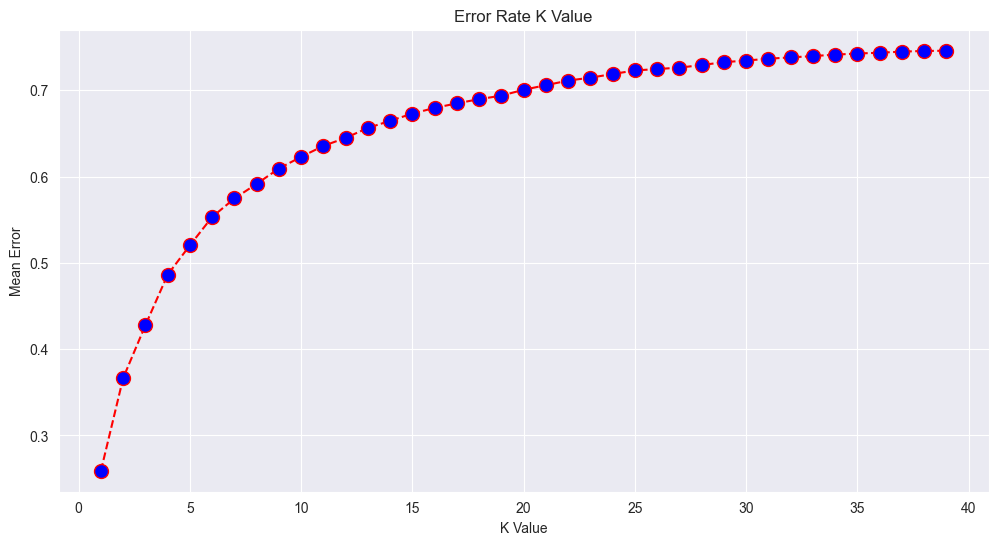

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Из построенных моделей видно, что, когда значение общих соседей превышает 5, то ошибка превышает 50% и стремится к 100%. Таким образом, 3-4 соседа самые оптимальные.

In [76]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_i = knn.predict(X_train)
error_train = np.mean(pred_i != y_train)
pred_i = knn.predict(X_test)
error_test = np.mean(pred_i != y_test)

In [77]:
print(error_test)
print(error_train)

0.4277893147064376
0.20172747439467598


Видно, что данный метод классификации не очень хорошо подходит для работы с данными данными. Даже с маленьким количеством соседей точность на обучающей выборке равна 20%, на тестовой - 42%.